In [1]:
from pymongo import MongoClient
from IPython.display import display, HTML, JSON
import pandas as pd
from joblib import Parallel, delayed
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
sci_col = MongoClient()["scimago"]["stage"]

In [3]:
#obtenemos todos los artículos por año para saber el ranking para el año específico
#scores = []
#for year in range(2013,2024):
def process_sjr_year(year):
    #year=2013
    #print(year)
    current_score = {}
    current_score["year"] = year
    data = list(MongoClient()["openalex_udea"]["works"].find({"type":"article","publication_year":year,"primary_location.source.issn":{"$ne":None}}))
    score=[]
    for paper in data:
        issns = paper["primary_location"]["source"]["issn"]
        for issn in issns:
            issn = issn.replace("-","") ## scimago issn is not splitted by -
            rec = sci_col.find_one({"Issn":issn})
            if rec is not None:
                if not np.isnan(rec['SJR']):
                    score.append(rec['SJR'])
                else:
                    print(rec)
    current_score["score"] = score
    current_score["data_len"] = len(data)
    current_score["score_len"] = len(score)
    return current_score

In [4]:
%%time
scores = Parallel(n_jobs=11,backend="multiprocessing",verbose=10)(delayed(process_sjr_year)(year) for year in range(2013,2024))

/usr/lib/python3/dist-packages/pymongo/topology.py:161: UserWarning: MongoClient opened before fork. Create MongoClient only after forking. See PyMongo's documentation for details: https://pymongo.readthedocs.io/en/stable/faq.html#is-pymongo-fork-safe
  warnings.warn(
/usr/lib/python3/dist-packages/pymongo/topology.py:161: UserWarning: MongoClient opened before fork. Create MongoClient only after forking. See PyMongo's documentation for details: https://pymongo.readthedocs.io/en/stable/faq.html#is-pymongo-fork-safe
  warnings.warn(
/usr/lib/python3/dist-packages/pymongo/topology.py:161: UserWarning: MongoClient opened before fork. Create MongoClient only after forking. See PyMongo's documentation for details: https://pymongo.readthedocs.io/en/stable/faq.html#is-pymongo-fork-safe
  warnings.warn(
/usr/lib/python3/dist-packages/pymongo/topology.py:161: UserWarning: MongoClient opened before fork. Create MongoClient only after forking. See PyMongo's documentation for details: https://pymo

CPU times: user 87.3 ms, sys: 69.8 ms, total: 157 ms
Wall time: 2min 32s


[Parallel(n_jobs=11)]: Done  11 out of  11 | elapsed:  2.5min finished


In [5]:
#h_scores = []
#for year in range(2013,2024):
def process_h_index_year(year):
    #year=2013
    #print(year)
    current_h_score = {}
    current_h_score["year"] = year
    h_data = list(MongoClient()["openalex_udea"]["works"].find({"type":"article","publication_year":year,"primary_location.source.issn":{"$ne":None}}))
    h_score=[]
    for paper in h_data:
        issns = paper["primary_location"]["source"]["issn"]
        for issn in issns:
            issn = issn.replace("-","") ## scimago issn is not splitted by -
            rec = sci_col.find_one({"Issn":issn})
            if rec is not None:
                if not np.isnan(rec['H index']):
                    h_score.append(rec['H index'])
                else:
                    print(rec)
    current_h_score["h_score"] = h_score
    current_h_score["h_data_len"] = len(h_data)
    current_h_score["h_score_len"] = len(h_score)
    return current_h_score
    #h_scores.append(current_h_score)

In [6]:
%%time
h_scores = Parallel(n_jobs=11,backend="multiprocessing",verbose=10)(delayed(process_h_index_year)(year) for year in range(2013,2024))

/usr/lib/python3/dist-packages/pymongo/topology.py:161: UserWarning: MongoClient opened before fork. Create MongoClient only after forking. See PyMongo's documentation for details: https://pymongo.readthedocs.io/en/stable/faq.html#is-pymongo-fork-safe
  warnings.warn(
/usr/lib/python3/dist-packages/pymongo/topology.py:161: UserWarning: MongoClient opened before fork. Create MongoClient only after forking. See PyMongo's documentation for details: https://pymongo.readthedocs.io/en/stable/faq.html#is-pymongo-fork-safe
  warnings.warn(
[Parallel(n_jobs=11)]: Using backend MultiprocessingBackend with 11 concurrent workers.
/usr/lib/python3/dist-packages/pymongo/topology.py:161: UserWarning: MongoClient opened before fork. Create MongoClient only after forking. See PyMongo's documentation for details: https://pymongo.readthedocs.io/en/stable/faq.html#is-pymongo-fork-safe
  warnings.warn(
/usr/lib/python3/dist-packages/pymongo/topology.py:161: UserWarning: MongoClient opened before fork. Crea

CPU times: user 106 ms, sys: 48.1 ms, total: 154 ms
Wall time: 2min 34s


[Parallel(n_jobs=11)]: Done  11 out of  11 | elapsed:  2.6min finished


In [7]:
# 2013 = 337 / 1425
# 2014 = 252 / 1366
# 2015 = 318 / 1513
# 2016 = 237 / 1573
# 2017 = 322 / 1720
# 2018 = 282 / 1781
# 2019 = 320 / 1886
# 2020 = 389 / 2163
# 2021 = 370 / 2176
# 2022 = 465 / 2240
# 2023 = 496 / 2011

for i in scores:
    data = np.array(i["score"])
    nans = np.count_nonzero(np.isnan(data))
    print(f"{i['year']} = {nans} / {len(data)}")


2013 = 0 / 362
2014 = 0 / 394
2015 = 0 / 448
2016 = 0 / 587
2017 = 0 / 656
2018 = 0 / 544
2019 = 0 / 868
2020 = 0 / 766
2021 = 0 / 786
2022 = 0 / 609
2023 = 0 / 626


In [8]:
for i in h_scores:
    h_data = np.array(i["h_score"])
    h_nans = np.count_nonzero(np.isnan(h_data))
    print(f"{i['year']} = {h_nans} / {len(h_data)}")


2013 = 0 / 362
2014 = 0 / 394
2015 = 0 / 448
2016 = 0 / 587
2017 = 0 / 656
2018 = 0 / 544
2019 = 0 / 868
2020 = 0 / 766
2021 = 0 / 786
2022 = 0 / 609
2023 = 0 / 626


In [9]:
for score in scores:
    print(f"year = {score['year']}")
    print(f"min  = {np.min(score['score'])}")
    print(f"max  = {np.max(score['score'])}")
    print("-"*10)
    

year = 2013
min  = -1.0
max  = 12.697
----------
year = 2014
min  = -1.0
max  = 5.166
----------
year = 2015
min  = -1.0
max  = 14.796
----------
year = 2016
min  = -1.0
max  = 14.796
----------
year = 2017
min  = -1.0
max  = 19.69
----------
year = 2018
min  = -1.0
max  = 12.11
----------
year = 2019
min  = -1.0
max  = 8.188
----------
year = 2020
min  = -1.0
max  = 9.281
----------
year = 2021
min  = -1.0
max  = 12.41
----------
year = 2022
min  = -1.0
max  = 9.281
----------
year = 2023
min  = -1.0
max  = 12.11
----------


In [10]:
for h_score in h_scores:
    print(f"year = {h_score['year']}")
    print(f"min  = {np.min(h_score['h_score'])}")
    print(f"max  = {np.max(h_score['h_score'])}")
    print("-"*10)

year = 2013
min  = 0
max  = 595
----------
year = 2014
min  = 0
max  = 404
----------
year = 2015
min  = 0
max  = 1130
----------
year = 2016
min  = 0
max  = 1130
----------
year = 2017
min  = 0
max  = 1331
----------
year = 2018
min  = 0
max  = 855
----------
year = 2019
min  = 0
max  = 654
----------
year = 2020
min  = 0
max  = 654
----------
year = 2021
min  = 1
max  = 1283
----------
year = 2022
min  = 0
max  = 600
----------
year = 2023
min  = 2
max  = 855
----------


In [11]:
for i in range(len(scores)):
    x = np.array(scores[i]["score"])
    scores[i]["score"] = x[~np.isnan(x)]
 

In [12]:
for i in range(len(h_scores)):
    y = np.array(h_scores[i]["h_score"])
    h_scores[i]["h_score"] = y[~np.isnan(y)]
 

In [13]:
thold=200
years = []
payload = {}
#payload["papers"]=[]
payload[f" 0  <= JSR < 2 "]=[]
payload[f" 2  <= JSR < 5 "]=[]
payload[f" 5 <= JSR < 10 "]=[]
payload[f" 10  <= JSR < 20 "]=[]
payload[f" JSR >= 20 "]=[]



for score in scores:
    years.append(str(score["year"]))
    #payload["papers"].append(score["data_len"])
    counter = {}
    counter[f" 0  <= JSR < 2 "]=0
    counter[f" 2  <= JSR < 5 "]=0
    counter[f" 5 <= JSR < 10 "]=0
    counter[f" 10  <= JSR < 20 "]=0
    counter[f" JSR >= 20 "]=0

    for i in score['score']:
        if i >= 0 and i < 1 :
            counter[f" 0  <= JSR < 2 "] += 1
        if i >= 1 and i < 5:
            counter[f" 2  <= JSR < 5 "] += 1
        if i >= 5  and i < 15:
            counter[f" 5 <= JSR < 10 "] += 1
        if i >=15 and i < 20:
            counter[f" 10  <= JSR < 20 "] += 1
        if i>=20:
            counter[f" JSR >= 20 "] += 1
            
    payload[f" 0  <= JSR < 2 "].append(counter[f" 0  <= JSR < 2 "])
    payload[f" 2  <= JSR < 5 "].append(counter[f" 2  <= JSR < 5 "])
    payload[f" 5 <= JSR < 10 "].append(counter[f" 5 <= JSR < 10 "])
    payload[f" 10  <= JSR < 20 "].append(counter[f" 10  <= JSR < 20 "])
    payload[f" JSR >= 20 "].append(counter[f" JSR >= 20 "])
payload

{' 0  <= JSR < 2 ': [243, 225, 242, 383, 418, 324, 565, 451, 429, 308, 278],
 ' 2  <= JSR < 5 ': [77, 88, 112, 135, 131, 136, 201, 208, 204, 178, 188],
 ' 5 <= JSR < 10 ': [2, 2, 4, 2, 14, 9, 9, 6, 16, 10, 10],
 ' 10  <= JSR < 20 ': [0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0],
 ' JSR >= 20 ': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]}

In [14]:
thold=200
h_years = []
h_payload = {}
#payload["papers"]=[]
h_payload[f" 0  <= H index < 20 "]=[]
h_payload[f" 20  <= H index < 50 "]=[]
h_payload[f" 50 <= H index < 100 "]=[]
h_payload[f" 100  <= H index < 200 "]=[]
h_payload[f" H index >= 200 "]=[]



for h_score in h_scores:
    h_years.append(str(h_score["year"]))
    #payload["papers"].append(score["data_len"])
    h_counter = {}
    h_counter[f" 0  <= H index < 20 "]=0
    h_counter[f" 20  <= H index < 50 "]=0
    h_counter[f" 50 <= H index < 100 "]=0
    h_counter[f" 100  <= H index < 200 "]=0
    h_counter[f" H index >= 200 "]=0

    for i in h_score['h_score']:
        if i >= 0 and i < 20 :
            h_counter[f" 0  <= H index < 20 "] += 1
        if i >= 20 and i < 50:
            h_counter[f" 20  <= H index < 50 "] += 1
        if i >= 50  and i < 100:
            h_counter[f" 50 <= H index < 100 "] += 1
        if i >=100 and i < 200:
            h_counter[f" 100  <= H index < 200 "] += 1
        if i >= 200:
            h_counter[f" H index >= 200 "] += 1
            
    h_payload[f" 0  <= H index < 20 "].append(h_counter[f" 0  <= H index < 20 "])
    h_payload[f" 20  <= H index < 50 "].append(h_counter[f" 20  <= H index < 50 "])
    h_payload[f" 50 <= H index < 100 "].append(h_counter[f" 50 <= H index < 100 "])
    h_payload[f" 100  <= H index < 200 "].append(h_counter[f" 100  <= H index < 200 "])
    h_payload[f" H index >= 200 "].append(h_counter[f" H index >= 200 "])
h_payload

{' 0  <= H index < 20 ': [132,
  153,
  171,
  130,
  160,
  119,
  160,
  158,
  157,
  119,
  124],
 ' 20  <= H index < 50 ': [52, 56, 60, 103, 108, 87, 102, 126, 132, 131, 124],
 ' 50 <= H index < 100 ': [83, 72, 76, 188, 199, 157, 345, 213, 236, 122, 127],
 ' 100  <= H index < 200 ': [68, 73, 88, 91, 108, 94, 134, 157, 139, 129, 171],
 ' H index >= 200 ': [27, 40, 53, 75, 81, 87, 127, 112, 122, 108, 80]}

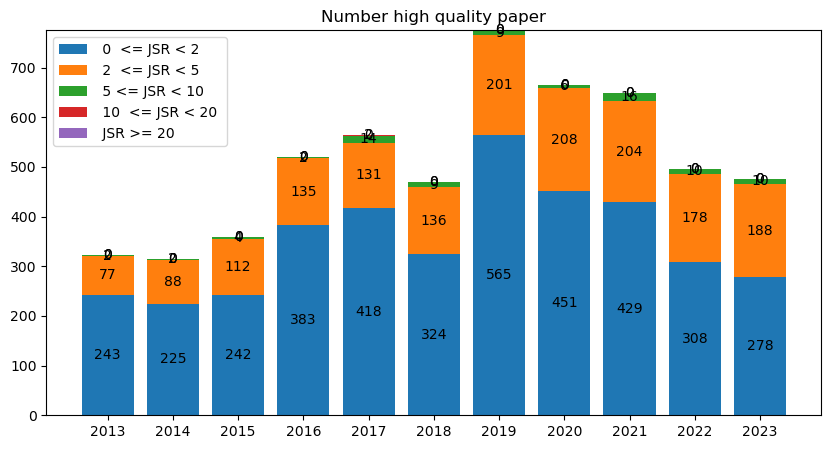

In [15]:

width = 0.8  # the width of the bars: can also be len(x) sequence


fig, ax = plt.subplots(figsize=(10, 5))
bottom = np.zeros(11)

for title, count in payload.items():
    p = ax.bar(years, count, width, label=title, bottom=bottom)
    bottom += count

    ax.bar_label(p, label_type='center')

ax.set_title('Number high quality paper')
ax.legend()

plt.show()

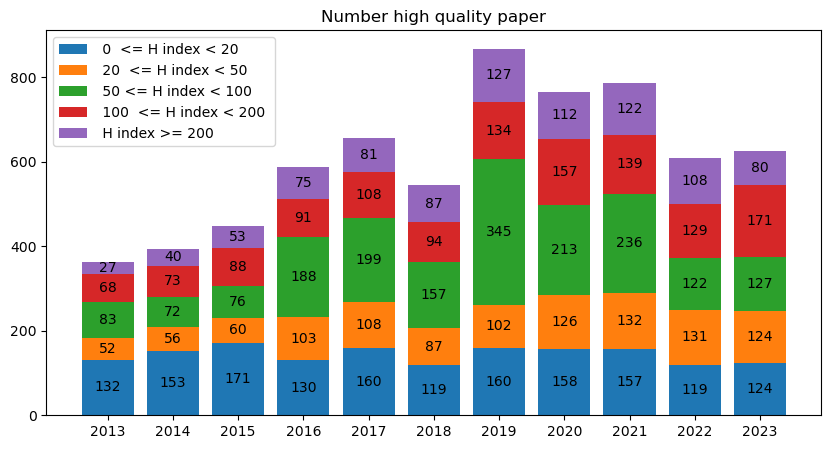

In [16]:

width = 0.8  # the width of the bars: can also be len(x) sequence


fig, ay = plt.subplots(figsize=(10, 5))
bottom = np.zeros(11)

for title, h_count in h_payload.items():
    h_p = ay.bar(h_years, h_count, width, label=title, bottom=bottom)
    bottom += h_count

    ay.bar_label(h_p, label_type='center')

ay.set_title('Number high quality paper')
ay.legend()

plt.show()

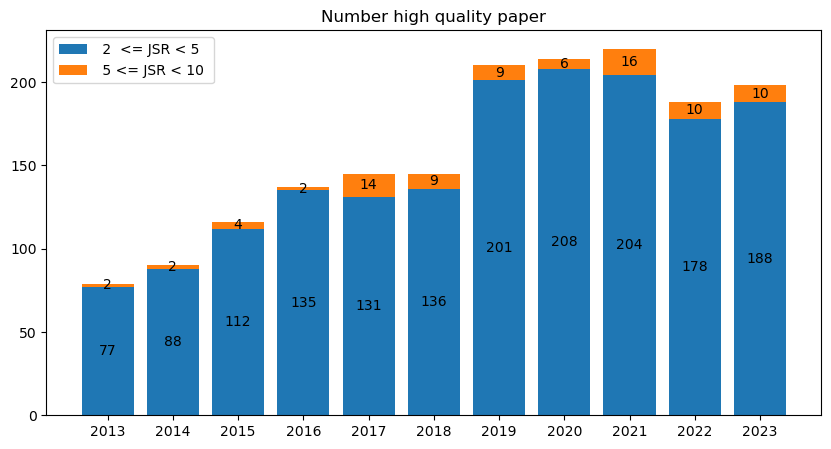

In [17]:
del payload[f" 0  <= JSR < 2 "]
del payload[f" 10  <= JSR < 20 "]
del payload[f" JSR >= 20 "]

width = 0.8  # the width of the bars: can also be len(x) sequence


fig, ax = plt.subplots(figsize=(10, 5))
bottom = np.zeros(11)

for title, count in payload.items():
    p = ax.bar(years, count, width, label=title, bottom=bottom)
    bottom += count

    ax.bar_label(p, label_type='center')

ax.set_title('Number high quality paper')
ax.legend()

plt.show()